<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left"/>
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.876 · Análisis de grafos y redes sociales</p>
<p style="margin: 0; text-align:right;">Máster universitario de Ciencia de datos (<i>Data Science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

# Introducción a NetworkX

[NetworkX](https://networkx.org/) es uno de los paquetes de Python más populares para la creación, manipulación y estudio de la estructura de las redes complejas en general (y las redes sociales en particular).

Al nivel más básico, una red se compone de dos elementos:

* Los sujetos representados, llamados *nodos* (**_nodes_**).
* Las relaciones entre ellos, llamadas *aristas* (**_edges_**).

## Primeros pasos

Importar **networkx** y crear de un grafo **vacío**.

In [2]:
import networkx as nx
G = nx.Graph()

Un **_graph_** o **grafo** es un conjunto de nodos relacionados por pares (mediante sus aristas, enlaces o relaciones). En NetworkX, los nodos pueden formarse a partir de casi cualquier objeto:
- Cadenas de texto (*strings*).
- Imágenes.
- Objetos XML.
- Otros grafos.
- Etc..

Los grafos pueden construirse de varias formas. 

## NODOS (NODES)

Empezaremos viendo cómo se incorporan nodos de forma simple.

In [4]:
G.clear() #Reiniciamos G.

# Por ejemplo, de uno en uno.

G.add_node(1)
print("1. El grafo G tiene los nodos: " + str(list(G.nodes())))

# O con una lista.

G.add_nodes_from([1,2,3,4,5])
# Observad que se ha intentado volver a insertar el nodo 1 pero ni se ha duplicado ni ha devuelto error, 
# simplemente se ha ignorado.
print("2. El grafo G tiene los nodos: " + str(list(G.nodes())))


1. El grafo G tiene los nodos: [1]
2. El grafo G tiene los nodos: [1, 2, 3, 4, 5]


## ARISTAS (EDGES)

Las aristas funcionan de forma muy parecida.

In [5]:
# Añadimos una arista sin atributos. Por ahora, es un Graph() y, por lo tanto, NO es direccional.

G.add_edge(1, 2) # Crea un enlace entre 1 y 2.
print("1. El grafo G tiene las aristas: " + str(list(G.edges())))

# También podemos añadir una lista de aristas.

G.add_edges_from([(1, 2), (1, 3)])
print("2. El grafo G tiene las aristas: " + str(list(G.edges())))

# De nuevo, las aristas ya existentes no se duplican ni dan error; se ignoran. 

1. El grafo G tiene las aristas: [(1, 2)]
2. El grafo G tiene las aristas: [(1, 2), (1, 3)]


Pero, ¿qué pasa si añadimos una arista entre nodos que no existen en el grafo? Vamos a comprobarlo.

In [6]:
print("Nodos iniciales: " + str(list(G.nodes())))
print("Aristas iniciales: " + str(list(G.edges())))

#Añadimos una arista entre 1 (que sí está) y 6 (que no) y una entre 7 y 8 (ninguna está entre los nodos iniciales).

G.add_edges_from([(1, 6), (7, 8)])

print("Nodos finales: " + str(list(G.nodes())))
print("Aristas finales: " + str(list(G.edges())))

Nodos iniciales: [1, 2, 3, 4, 5]
Aristas iniciales: [(1, 2), (1, 3)]
Nodos finales: [1, 2, 3, 4, 5, 6, 7, 8]
Aristas finales: [(1, 2), (1, 3), (1, 6), (7, 8)]


Así, comprobamos que añadir aristas también crea los nodos necesarios. Hay que ser cauteloso con la creación, puesto que pueden darse generaciones no deseadas al intentar establecer un vínculo entre dos nodos referenciados de forma incorrecta sin darnos cuenta de ello.

### Eliminar nodos o aristas

Para eliminar nodos o aristas existen las funciones inversas a las de añadir. Sustituyen el *add* por el *remove*. 

In [8]:
print("Nodos: " + str(list(G.nodes())))
print("Aristas: " + str(list(G.edges())))

# Añadimos nodo 9 y aristas (10,11) y (8,9)
G.add_node(9)
G.add_edges_from([(10, 11), (8, 9)])

print("\nAñadimos nodo 9 y dos aristas entre 10 y 11 (que se crean) y 8 y 9 (que existen)")
print("Nodos: " + str(list(G.nodes())))
print("Aristas: " + str(list(G.edges())))

# Eliminamos nodo 10 y arista (8,9)
G.remove_node(10)
G.remove_edge(8, 9)

print("\nEliminamos nodo 10 y arista (8,9)")
print("Nodos: " + str(list(G.nodes())))
print("Aristas: " + str(list(G.edges())))

print("\nAl eliminar el nodo 10, ha eliminado automáticamente la arista 10,11, pero el nodo 11 sigue ahí.")
print("Eliminar la arista 8, 9 no afecta a los nodos, solo a su enlace.")

# Eliminamos nodos 9 y 11 que han quedado sin tocar.
G.remove_nodes_from([9,11])

print("\nVuelta al estado inicial")
print("Nodos: " + str(list(G.nodes())))
print("Aristas: " + str(list(G.edges())))

Nodos: [1, 2, 3, 4, 5, 6, 7, 8]
Aristas: [(1, 2), (1, 3), (1, 6), (7, 8)]

Añadimos nodo 9 y dos aristas entre 10 y 11 (que se crean) y 8 y 9 (que existen)
Nodos: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Aristas: [(1, 2), (1, 3), (1, 6), (7, 8), (8, 9), (10, 11)]

Eliminamos nodo 10 y arista (8,9)
Nodos: [1, 2, 3, 4, 5, 6, 7, 8, 9, 11]
Aristas: [(1, 2), (1, 3), (1, 6), (7, 8)]

Al eliminar el nodo 10, ha eliminado automáticamente la arista 10,11, pero el nodo 11 sigue ahí.
Eliminar la arista 8, 9 no afecta a los nodos, solo a su enlace.

Vuelta al estado inicial
Nodos: [1, 2, 3, 4, 5, 6, 7, 8]
Aristas: [(1, 2), (1, 3), (1, 6), (7, 8)]


## GENERADORES

Entraremos más adelante en este caso, pero por ahora basta decir que NetworkX contiene cantidad de funciones dedicadas a generar de forma automática varios tipos de grafos comunes o habituales de estudio. Por ejemplo, el [grafo de Petersen](https://en.wikipedia.org/wiki/Petersen_graph "Petersen Graph en Wikipedia.org"):

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/9/91/Petersen1_tiny.svg/200px-Petersen1_tiny.svg.png "Petersen Graph")

In [9]:
# Generar el grafo de Petersen

petersen = nx.petersen_graph()

print("El grafo de Petersen tiene por nodos: " + str(list(petersen.nodes())))
print("El grafo de Petersen tiene por aristas: " + str(list(petersen.edges())))

# Otros generadores admiten parámetros. Por ejemplo, generar un grafo completo de tamaño K. Probamos para K = 4.

K_4 = nx.complete_graph(4)

print("El grafo completo de K=4 tiene por nodos: " + str(list(K_4.nodes())))
print("El grafo completo de K=4 tiene por aristas: " + str(list(K_4.edges())))

El grafo de Petersen tiene por nodos: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
El grafo de Petersen tiene por aristas: [(0, 1), (0, 4), (0, 5), (1, 2), (1, 6), (2, 3), (2, 7), (3, 4), (3, 8), (4, 9), (5, 7), (5, 8), (6, 8), (6, 9), (7, 9)]
El grafo completo de K=4 tiene por nodos: [0, 1, 2, 3]
El grafo completo de K=4 tiene por aristas: [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]


No entraremos más en detalle por ahora, pero vamos a dibujarlos con matplotlib para visualizarlos.

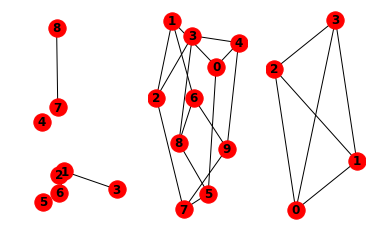

In [12]:
import matplotlib.pyplot as plt

# Procedemos a dibujar, de izquierda a derecha, a G (tal y como quedó en el último paso), Petersen y K_4.

plt.subplot(131)
nx.draw_random(G, with_labels=True, font_weight='bold')
plt.subplot(132)
nx.draw(petersen, with_labels=True, font_weight='bold')
plt.subplot(133)
nx.draw(K_4, with_labels=True, font_weight='bold')
plt.show()

Parece que el Petersen (en el medio) está un poco atropellado, ¿verdad? En realidad, hay que tener en cuenta algo importante: un grafo no tiene una forma definida, del mismo modo que sus aristas no tienen una dimensión de "distancia". Así, aunque parezca muy distinto a la imagen limpia del apartado anterior, es en realidad **exactamente** el mismo grafo. Pero sí, el anterior era más claro y más bonito; más adelante veremos cómo lograr, en la medida de lo posible, que los grafos luzcan bonitos.


## PROPIEDADES BÁSICAS

Una vez representado el grafo, es el momento de trabajar con él. Empecemos viendo las operaciones básicas que pueden realizarse sobre sus componentes para comprobar sus propiedades.

- G.nodes(): Para obtener la lista de nodos.
- G.edges(): Para obtener la lista de aristas.
- G.adj\[NODO\]: Para obtener la lista de nodos adyacentes (*vecinos*) a NODO.
- G.degree\[NODO\]: Para obtener el grado de NODO (es decir, el número de aristas que le llegan).


In [13]:
# Usamos G como referencia de nuevo. Se puede ver el grafo dibujado para comprobar los resultados.

print("Nodos: " + str(list(G.nodes())))
print("Aristas: " + str(list(G.edges())))
print("Nodos vecinos de 1: " + str(list(G.adj[1])))
print("Grado del nodo 1: " + str(G.degree[1]))

Nodos: [1, 2, 3, 4, 5, 6, 7, 8]
Aristas: [(1, 2), (1, 3), (1, 6), (7, 8)]
Nodos vecinos de 1: [2, 3, 6]
Grado del nodo 1: 3


**NOTA:** Es necesario tener en cuenta que los métodos que listan nodos, aristas y adyacentes han cambiado en NetworkX 2 respecto a la versión 1.x anterior. No entraremos en detalles, aunque pueden consultarse en el [anuncio oficial](https://networkx.github.io/documentation/stable/release/release_2.0.html "NetworkX Release 2.0"). 

Básicamente, las funciones del tipo *nodes()* devolvían una lista de objetos y los *nodes_iter()*, un iterador. Ahora, los primeros devuelven una vista (iterable) de solo lectura *NodeView*, lo que ha sustituido la segunda función, que ya no es necesaria. Para sacar la lista de la vista es suficiente usar la función de Python *list()*, como hemnos hecho hasta este punto. Vamos a comprobar la diferencia.

In [14]:
G.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8))

In [15]:
list(G.nodes())

[1, 2, 3, 4, 5, 6, 7, 8]

In [16]:
# NodeView es iterable
for node in G.nodes():
    print(node)

1
2
3
4
5
6
7
8


## ATRIBUTOS

Hasta este momento, los nodos y las aristas creadas están vacíos. Representan una relación pero carecen de atributos. A veces interesa que sea así (por ejemplo, la relación "vive con" no necesita atributo) pero también hay casos en los que nos interesa mantener más información (por ejemplo, si la persona representada en un nodo es hombre o mujer, o el número de veces que una persona ha visto a otra durante un cierto periodo de tiempo).

¿Cómo se añaden los atributos?

### Añadir atributos a nodos

In [17]:
#Directamente en la creación

G.add_node(1, sexo='mujer')
G.add_nodes_from([3,6], sexo='hombre')

#Creando el atributo y añadiéndolo (o modificándolo)
G.nodes[3]['sexo'] = 'mujer'
G.nodes[8]['edad'] = 25
G.nodes[8]['sexo'] = 'hombre'

# Así lo vemos ordenado, cada nodo con sus atributos.
for node in G.nodes.data():
    print(node)

(1, {'sexo': 'mujer'})
(2, {})
(3, {'sexo': 'mujer'})
(4, {})
(5, {})
(6, {'sexo': 'hombre'})
(7, {})
(8, {'edad': 25, 'sexo': 'hombre'})


### Añadir atributos a aristas

Un caso muy típico es el peso, *weight*. Solo hay que tener en cuenta que este atributo en concreto es un poco especial y debería ser numérico, porque muchos algoritmos lo usan para sus cálculos (recorridos mínimos, por ejemplo). Para el resto, la misma libertad y funcionalidad que con los nodos.

In [18]:
# Directamente en la creación
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='blue')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])

# Creando el atributo y añadiéndolo (o modificándolo)
G[1][6]['weight'] = 3.0
G.edges[3, 4]['weight'] = 4.2

for edge in G.edges.data():
    print(edge)

(1, 2, {'weight': 4.7, 'color': 'blue'})
(1, 3, {})
(1, 6, {'weight': 3.0})
(2, 3, {'weight': 8})
(3, 4, {'color': 'blue', 'weight': 4.2})
(4, 5, {'color': 'blue'})
(7, 8, {})


Un caso que puede llamar la atención en el ejemplo anterior es G\[1\]\[6\]. Solo hay que tener en cuenta que:
- G\[1\] es equivalente a G.adj\[1\], visto anteriormente.
- G\[1\], por lo tanto, devuelve los adyacentes a 1, que son 2, 3 y 6. 
- G\[1\]\[6\] se refiere al nodo 6 adyacente a 1, siendo otra forma de referirse a la arista (1,6).
- Tanto G\[1\]\[6\] como G.edges\[1, 6\] devuelven directamente el diccionario de atributos de la arista.

Es quizás poco intuitivo, pero ejecutar G\[1\]\[5\], por ejemplo, resultará en error, porque no existe vínculo entre 1 y 5.

In [19]:
print(G[1] == G.adj[1])
print(G[1][6] == G.edges[1, 6])

True
True


## GRAFOS DIRIGIDOS

También es importante mencionar los grafos dirigidos. Se ha visto que los grafos sin dirección responden a relaciones que son obligatoriamente recíprocas (por ejemplo, si Ana vive con José, José vive con Ana). Pero muchas relaciones no lo son, sino que tienen dirección. Por ejemplo, la amistad. Que Ana considere a José su amigo no significa que José considere a Ana como su amiga *per se*. A su vez, hay algoritmos que solo funcionan en grafos dirigidos (pero también hay otros que no están bien definidos sobre grafos dirigidos, así que existe la posibilidad de transformarlos, aunque perdiendo su significado original).

Sus funcionalidades básicas son muy parecidas a las de Graph():

In [20]:
# Crear un grafo dirigido

DG = nx.DiGraph()

# Añadir aristas/nodos con pesos

DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])

# Mostrar el GRADO (pero aquí se tiene en cuenta el peso de cada arista que pasa por el nodo)
print(DG.degree(1, weight='weight'))

# Las dos formas de obtener los adyacentes 
print(list(DG.adj[1]))
print(list(DG.neighbors(1)))


1.25
[2]
[2]


Pero, un momento, si existen las aristas (1,2) y (3,1), ¿por qué no aparece 3 como vecino de 1 en DG.adj\[1\]? 

La respuesta se encuentra en las funciones propias de DiGraph, como *in_degree()* y *out_degree()* (aristas entrantes y salientes) o *predecessors()* y *successors()* para obtener sus adyacentes direccionales. DG.adj es equivalente, para DiGraph, a los sucesores. 

Así, solo devolverá los nodos a los que se llegue desde 1, no los que lleguen al mismo.

Veamos las funciones propias en acción

In [21]:
print(DG.in_degree(1)) # Grado ENTRANTE
print(DG.in_degree(1, weight='weight')) # Suma de pesos ENTRANTES
print(DG.out_degree(1, weight='weight')) # Suma de pesos SALIENTES
print(list(DG.predecessors(1))) # Lista de PREDECESORES
print(list(DG.successors(1))) # Lista de SUCESORES

1
0.75
0.5
[3]
[2]


## MULTIGRAFOS

Un caso particular (y habitualmente menos útil, salvo para aplicaciones específicas) es el multigrafo, al que NetworkX también da cierto soporte. Pocos algoritmos están definidos para ellos, pero básicamente son una extensión del grafo o del grafo dirigido en la que es posible tener definidas dos aristas entre el mismo par de nodos.

In [22]:
# Creación

MG = nx.MultiGraph() # O MultiDiGraph() para direccionales.

# Construcción

MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])

# Grados por nodo

dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

Nótese que el grado de 1 es la suma de dos aristas que van al mismo nodo, 2, que el grado de 2 es la suma de las dos aristas que le llegan de 1 y de la que va hacia 3, mientras que el nodo 3 solo recibe una arista de 2.